# 2024 RSNA Lumbar Spine Degeneration Classification

* First Notebook Initial EDA
* Look at file structures
* Simple submission first to make sure format is right

## Imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pydicom as dicom

## Data Contents

* 5 csv files
    * train.csv, train_label_coordinates.csv, train_series_descriptions.csv, test_series_descriptions.csv, ss.csv
* 1975 train images directories, each has multiple subdirectories with multiple .dcm files (18-40ish)


In [2]:
train_img_dir = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_images/'

train = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train.csv')
print(train.shape)
train.head()

(1975, 26)


,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild


This file gives the study id, and severity classification for each subtype

In [3]:
# this is for an initial sub of the means for a baseline
sub_cols = [col for col in train.columns if 'study' not in col]

probs = {}

for col in sub_cols:
    
    vals = train[col].value_counts().values
    tot = sum(vals)
    probs[col] = [vals[0]/tot,vals[1]/tot,vals[2]/tot]

In [4]:
probs['spinal_canal_stenosis_l1_l2']

[0.955420466058764, 0.033941236068895646, 0.010638297872340425]

In [5]:
#train[sub_cols].value_counts()

In [6]:
train_label_coords = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_label_coordinates.csv')
train_label_coords.loc[90:130]

,study_id,series_id,instance_number,condition,level,x,y
90,8785691,2406919186,3,Left Subarticular Stenosis,L1/L2,207.457627,205.016949
91,8785691,2406919186,3,Right Subarticular Stenosis,L1/L2,172.608589,206.370552
92,8785691,2406919186,7,Right Subarticular Stenosis,L2/L3,174.022086,212.024540
93,8785691,2406919186,8,Left Subarticular Stenosis,L2/L3,207.050847,211.525424
94,8785691,2406919186,11,Right Subarticular Stenosis,L3/L4,177.320245,205.428221
95,8785691,2406919186,12,Left Subarticular Stenosis,L3/L4,205.220339,205.423729
96,8785691,2406919186,16,Left Subarticular Stenosis,L4/L5,207.254237,202.983051
97,8785691,2406919186,17,Right Subarticular Stenosis,L4/L5,175.435583,198.360736
98,8785691,2406919186,20,Left Subarticular Stenosis,L5/S1,209.491525,201.152542
99,8785691,2406919186,20,Right Subarticular Stenosis,L5/S1,175.435583,197.418405


In [7]:
len(train_label_coords)

48692

This file gives the coordinates of the degeneration, and also the series id (subfolder), as well as the instance number which is the locatio of the individual dicom file in the 3d stack. Level is the relevant vertebrae

In [8]:
train_series_desc = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/train_series_descriptions.csv')
train_series_desc.head(20)

,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1
5,4646740,3666319702,Sagittal T2/STIR
6,7143189,132939515,Sagittal T2/STIR
7,7143189,1951927562,Axial T2
8,7143189,3219733239,Sagittal T1
9,8785691,481125819,Sagittal T2/STIR


Gives the orientation of each study/series id
* Maybe separate classifiers for each orientation (this is something we will know for the test data.

In [9]:
test_desc = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/test_series_descriptions.csv')
test_desc.head()

,study_id,series_id,series_description
0,44036939,2828203845,Sagittal T1
1,44036939,3481971518,Axial T2
2,44036939,3844393089,Sagittal T2/STIR


In [10]:
ss = pd.read_csv('/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/sample_submission.csv')
ss.head()

,row_id,normal_mild,moderate,severe
0,44036939_left_neural_foraminal_narrowing_l1_l2,0.333333,0.333333,0.333333
1,44036939_left_neural_foraminal_narrowing_l2_l3,0.333333,0.333333,0.333333
2,44036939_left_neural_foraminal_narrowing_l3_l4,0.333333,0.333333,0.333333
3,44036939_left_neural_foraminal_narrowing_l4_l5,0.333333,0.333333,0.333333
4,44036939_left_neural_foraminal_narrowing_l5_s1,0.333333,0.333333,0.333333


## Look at some  of the Dicom Files
* And put a red dot where the coordinates indicate the problem is

study_id                             10728036
series_id                           142859125
instance_number                             8
condition          Left Subarticular Stenosis
level                                   L1/L2
x                                  290.555985
y                                  251.057915
Name: 100, dtype: object


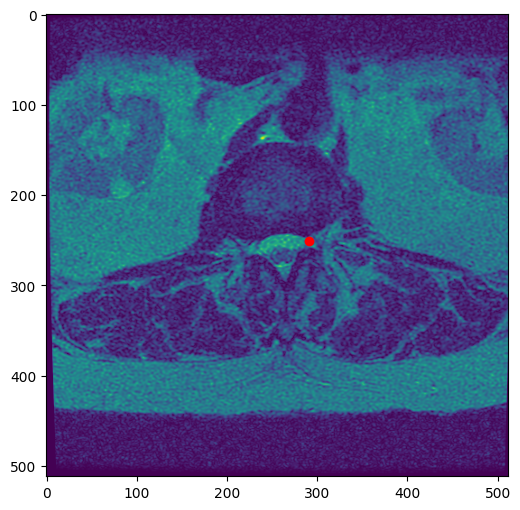

study_id                                   22191399
series_id                                 434280813
instance_number                                   5
condition          Right Neural Foraminal Narrowing
level                                         L5/S1
x                                        288.983914
y                                        308.600455
Name: 200, dtype: object


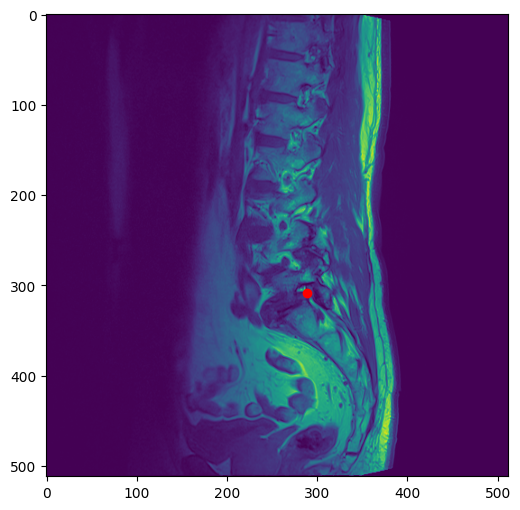

study_id                        38281420
series_id                      880361156
instance_number                        9
condition          Spinal Canal Stenosis
level                              L1/L2
x                             201.911765
y                              69.705882
Name: 300, dtype: object


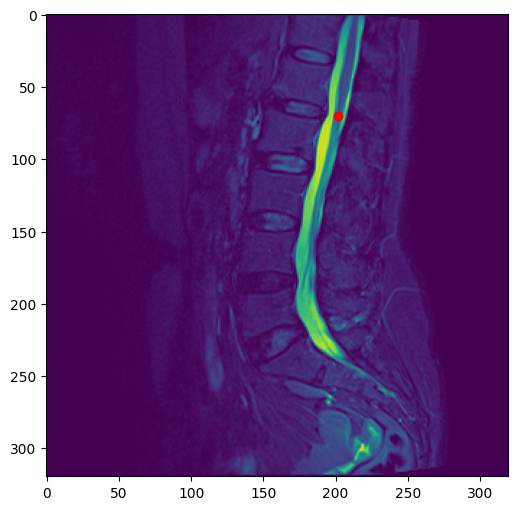

study_id                             46494080
series_id                          1543341132
instance_number                             3
condition          Left Subarticular Stenosis
level                                   L3/L4
x                                  278.116983
y                                  259.731778
Name: 400, dtype: object


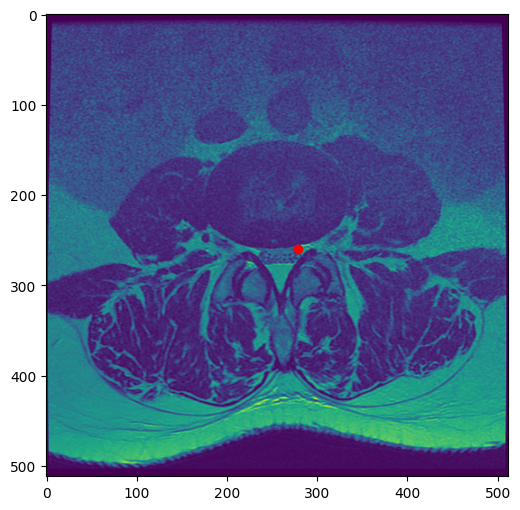

study_id                             58813022
series_id                           302608236
instance_number                            27
condition          Left Subarticular Stenosis
level                                   L3/L4
x                                  152.190789
y                                  147.536842
Name: 500, dtype: object


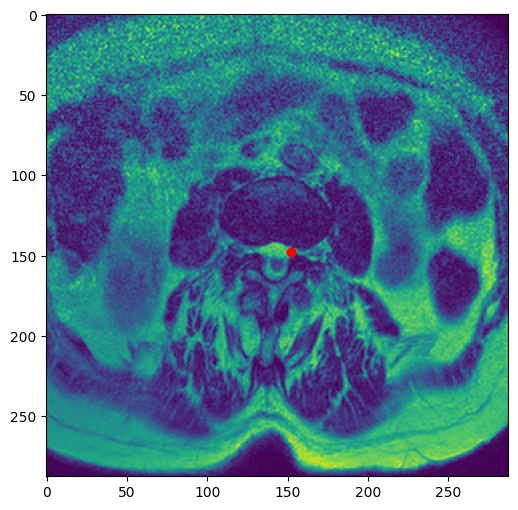

In [11]:
for row in [100,200,300,400,500]: 
    coords = train_label_coords.loc[row]
    study_id = coords.study_id
    ser_id = coords.series_id
    instance = coords.instance_number
    x = coords.x
    y = coords.y

    print(coords)
    # construct a filename to load
    file_name = f'{train_img_dir}/{study_id}/{ser_id}/{instance}.dcm'

    # load image and plot
    plt.figure(figsize=(6,6))
    ds = dicom.dcmread(file_name)
    plt.imshow(ds.pixel_array)
    plt.scatter(x,y,c='r')
    plt.show()

# Estimate means for initial submission

In [12]:
# test_rows = ss.row_id
# image_ids = []
# pred_types = []

# for row in test_rows:
#     img_id = row.split('_')[0]
#     image_ids.append(img_id)
#     pred_types.append(row[len(img_id)+1:])
    

In [13]:
# test_preds = []

# for row in pred_types:
#     test_preds.append(probs[row])
    
# test_preds = np.array(test_preds)

In [14]:
# ss.normal_mild = test_preds[:,0]
# ss.moderate = test_preds[:,1]
# ss.severe = test_preds[:,2]

# ss.head()

In [15]:
ss.to_csv('submission.csv',index=False)

# First, submit means of training data